In [ ]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Replace with your actual file name
file = uproot.open("D02445-02448_Tracks_Calibration37Ar_cronTREX_V2.3.15_cal7x7at270V270V_cal3x3-2peaks.root")
file2 = uproot.open("D02456to02457_Tracks_Calibration37Ar_cronTREX_V2.3.15_cal7x7_cal3x3.root")
# List all the keys in the file (e.g., TTrees, histograms, etc.)
file.keys()

['AnalysisTree;1', 'ds;1', 'cal3x3;1']

In [2]:
# Example: access a TTree called "Events"
tree = file["AnalysisTree"]
tree2 = file2["AnalysisTree"]

# List available branches (observables)
tree.keys()

['cal3x3_pmID',
 'cal3x3_trackEnergy',
 'cal3x3_trackEnergy_NoSegmentation',
 'cal7x7_pmID',
 'cal7x7_trackEnergy',
 'cal7x7_trackEnergy_NoSegmentation',
 'TREXsides_tagId',
 'eventID',
 'hits2tckAna_balanceXYenergy',
 'hits2tckAna_balanceXYnHits',
 'hits2tckAna_energy',
 'hits2tckAna_energyX',
 'hits2tckAna_energyY',
 'hits2tckAna_maxHitEnergy',
 'hits2tckAna_meanHitEnergy',
 'hits2tckAna_meanHitEnergyBalance',
 'hits2tckAna_minHitEnergy',
 'hits2tckAna_nHits',
 'hits2tckAna_nHitsSizeXY',
 'hits2tckAna_nHitsX',
 'hits2tckAna_nHitsY',
 'hits2tckAna_xMean',
 'hits2tckAna_xSigma',
 'hits2tckAna_xy2Sigma',
 'hits2tckAna_xySigmaBalance',
 'hits2tckAna_xySkew',
 'hits2tckAna_yMean',
 'hits2tckAna_ySigma',
 'hits2tckAna_z2Sigma',
 'hits2tckAna_zMean',
 'hits2tckAna_zSkew',
 'rawAna_AmplitudeIntegralRatio',
 'rawAna_AmplitudeRatio',
 'rawAna_AveragePeakTime',
 'rawAna_BaseLineMean',
 'rawAna_BaseLineSigmaMean',
 'rawAna_FullIntegral',
 'rawAna_IntegralBalance',
 'rawAna_MaxPeakAmplitude',
 'r

In [3]:
# Read observables
energy = tree["cal3x3_trackEnergy_NoSegmentation"].array()
xy2sigma = tree["hits2tckAna_xy2Sigma"].array()
z2sigma = tree["hits2tckAna_z2Sigma"].array()
amplitude_ratio = tree["rawAna_AmplitudeRatio"].array()
xMean = tree["hits2tckAna_xMean"].array()
yMean = tree["hits2tckAna_yMean"].array()

# Read observables
energy2 = tree2["cal3x3_trackEnergy_NoSegmentation"].array()
xy2sigma2 = tree2["hits2tckAna_xy2Sigma"].array()
z2sigma2 = tree2["hits2tckAna_z2Sigma"].array()
amplitude_ratio2 = tree2["rawAna_AmplitudeRatio"].array()
xMean2 = tree2["hits2tckAna_xMean"].array()
yMean2 = tree2["hits2tckAna_yMean"].array()


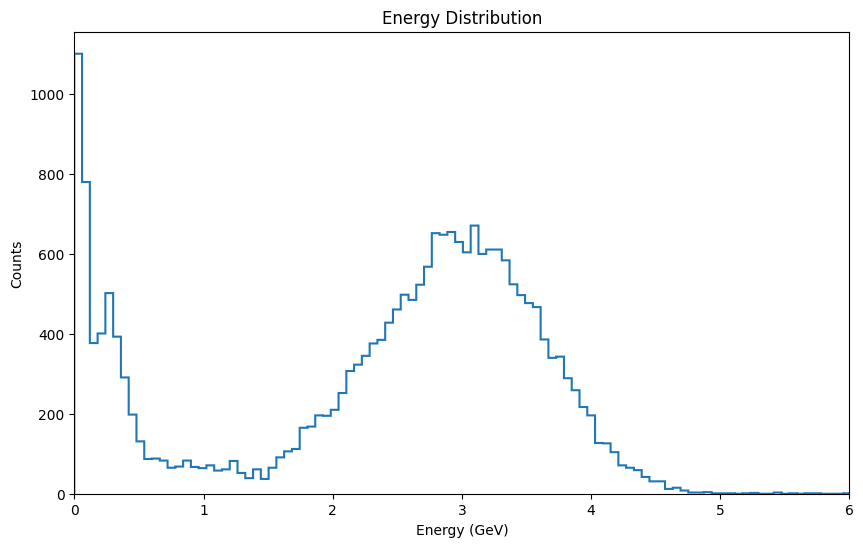

In [4]:
# Example: plot the distribution of an observable "energy"
plt.figure(figsize=(10, 6))
plt.hist(ak.to_numpy(energy), bins=1000, histtype='step', linewidth=1.5)
#plt.hist(ak.to_numpy(energy2), bins=1000, histtype='step', linewidth=1.5)

plt.xlabel("Energy (GeV)")
plt.ylabel("Counts")
plt.title("Energy Distribution")

plt.xlim(0,6)

plt.show()

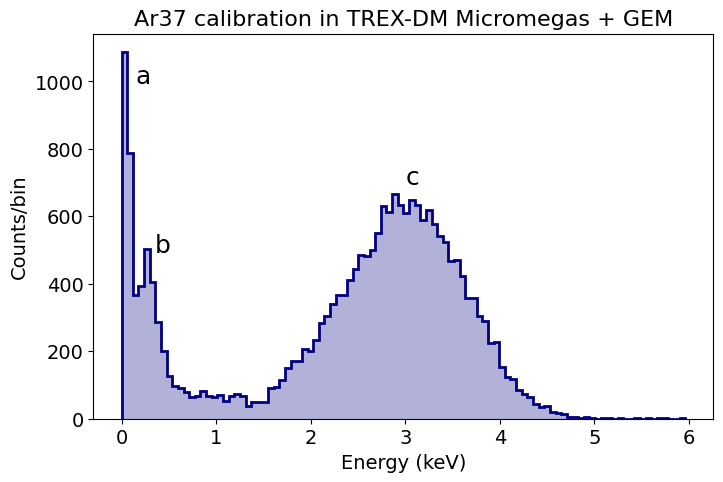

In [25]:
# Apply the cut: only keep entries where xy2Sigma > 3
cut = (energy < 6)
cut_energy = (energy < 6) & (xMean > 25) & (xMean < 200) &  (yMean > 25) & (yMean < 200)



# Plot the result
plt.figure(figsize=(8, 5))
plt.hist(ak.to_numpy(energy[cut]), bins=100, histtype='stepfilled', color='navy', density=False, alpha = 0.3)
plt.hist(ak.to_numpy(energy[cut]), bins=100, histtype='step', linewidth=2, color='navy', density=False, label = "All events")
#plt.hist(ak.to_numpy(energy[cut_energy]), bins=100, histtype='stepfilled', color='limegreen', alpha = 0.3)
#plt.hist(ak.to_numpy(energy[cut_energy]), bins=100, histtype='step', linewidth=2, color='forestgreen', label = "Fiducial area (25-200)")

#plt.hist(ak.to_numpy(energy2), bins=51, histtype='stepfilled', color='forestgreen', alpha = 0.3, density=False)

plt.text(0.15, 1050, "a", fontsize=18, color="black", verticalalignment='top')
plt.text(0.35, 550, "b", fontsize=18, color="black", verticalalignment='top')
plt.text(3, 750, "c", fontsize=18, color="black", verticalalignment='top')

plt.xlabel("Energy (keV)", size=14)
plt.ylabel("Counts/bin", size=14)
plt.title("Ar37 calibration in TREX-DM Micromegas + GEM", size=16)

#plt.xlim(0,6)
#plt.legend()
plt.tick_params(axis='both', labelsize=14)
plt.show()

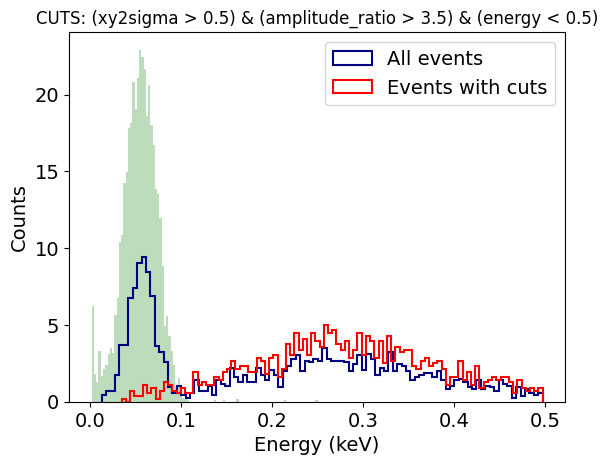

In [6]:
# Apply the cut: only keep entries where xy2Sigma > 3
cut_energy = (energy < 0.5) & (xMean > 25) & (xMean < 200) &  (yMean > 25) & (yMean < 200)
cut_mask = (xy2sigma > 0.5) & (amplitude_ratio > 3.5) & (energy < 0.5) &  (xMean > 25) & (xMean < 200) &  (yMean > 25) & (yMean < 200)
cut2 = (energy2 < 0.5)

# Plot the result
plt.hist(ak.to_numpy(energy[cut_energy]), bins=100, histtype='step', linewidth=1.5, color='navy', density=True, label = "All events")
plt.hist(ak.to_numpy(energy[cut_mask]), bins=100, histtype='step', linewidth=1.5, color='red', density=True, label = "Events with cuts")
plt.hist(ak.to_numpy(energy2[cut2]), bins=100, histtype='stepfilled', color='forestgreen', alpha = 0.3, density=True)
plt.xlabel("Energy (keV)", size=14)
plt.ylabel("Counts", size=14)
plt.title("CUTS: (xy2sigma > 0.5) & (amplitude_ratio > 3.5) & (energy < 0.5)")

#plt.xlim(0,6)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()

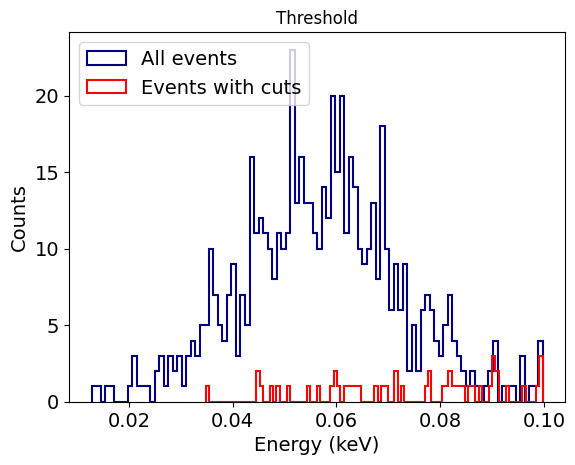

In [7]:
# Apply the cut: only keep entries where xy2Sigma > 3
cut_energy = (energy < 0.1) & (xMean > 25) & (xMean < 200) &  (yMean > 25) & (yMean < 200)
cut_mask = (xy2sigma > 0.5) & (amplitude_ratio > 3.5) & (energy < 0.1)& (xMean > 25) & (xMean < 200) &  (yMean > 25) & (yMean < 200)

# Plot the result
plt.hist(ak.to_numpy(energy[cut_energy]), bins=100, histtype='step', linewidth=1.5, color='navy', label = "All events")
plt.hist(ak.to_numpy(energy[cut_mask]), bins=100, histtype='step', linewidth=1.5, color='red', label = "Events with cuts")
plt.xlabel("Energy (keV)", size=14)
plt.ylabel("Counts", size=14)
plt.title("Threshold")

#plt.xlim(0,6)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()

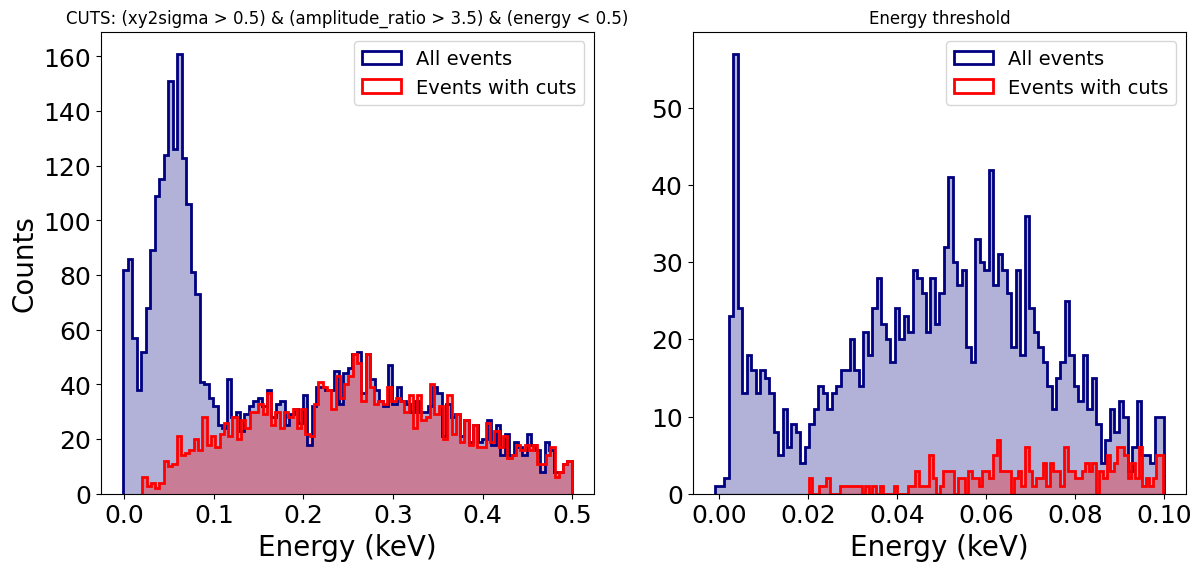

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PLOT 1

# Apply the cut: only keep entries where xy2Sigma > 3
cut_energy1 = (energy < 0.5)
cut_mask1 = (xy2sigma > 0.5) & (amplitude_ratio > 3.5) & (energy < 0.5)

# Plot the result
axes[0].hist(ak.to_numpy(energy[cut_energy1]), bins=100, histtype='stepfilled', color='navy',alpha=0.3)
axes[0].hist(ak.to_numpy(energy[cut_energy1]), bins=100, histtype='step',color='navy', linewidth=2, alpha=1,  label = "All events")
axes[0].hist(ak.to_numpy(energy[cut_mask1]), bins=100, histtype='stepfilled', color='red',alpha=0.3)
axes[0].hist(ak.to_numpy(energy[cut_mask1]), bins=100, histtype='step',color='red', linewidth=2, alpha=1, label = "Events with cuts")
axes[0].set_xlabel("Energy (keV)", size=20)
axes[0].set_ylabel("Counts", size=20)
axes[0].set_title("CUTS: (xy2sigma > 0.5) & (amplitude_ratio > 3.5) & (energy < 0.5)")

#plt.xlim(0,6)
axes[0].tick_params(axis='both', labelsize=18)
axes[0].legend(fontsize=14)


# PLOT 2

# Apply the cut: only keep entries where xy2Sigma > 3
cut_energy2 = (energy < 0.1)
cut_mask2 = (xy2sigma > 0.5) & (amplitude_ratio > 3.5) & (energy < 0.1)

# Plot the result
axes[1].hist(ak.to_numpy(energy[cut_energy2]), bins=100, histtype='stepfilled', color='navy',alpha=0.3, edgecolor='navy')
axes[1].hist(ak.to_numpy(energy[cut_energy2]), bins=100, histtype='step',color='navy', linewidth=2, alpha=1,  label = "All events")
axes[1].hist(ak.to_numpy(energy[cut_mask2]), bins=100, histtype='stepfilled', color='red', alpha=0.3, edgecolor='darkred')
axes[1].hist(ak.to_numpy(energy[cut_mask2]), bins=100, histtype='step',color='red', linewidth=2, alpha=1, label = "Events with cuts")
# axes[1].hist(ak.to_numpy(energy[cut_mask2]), bins=100, histtype='step', linewidth=1.5, color='red', label = "Events with cuts")
axes[1].set_xlabel("Energy (keV)", size=20)
#axes[1].set_ylabel("Counts", size=20)
axes[1].set_title("Energy threshold")

#plt.xlim(0,6)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].legend(fontsize=14)

#plt.tight_layout()
plt.show()


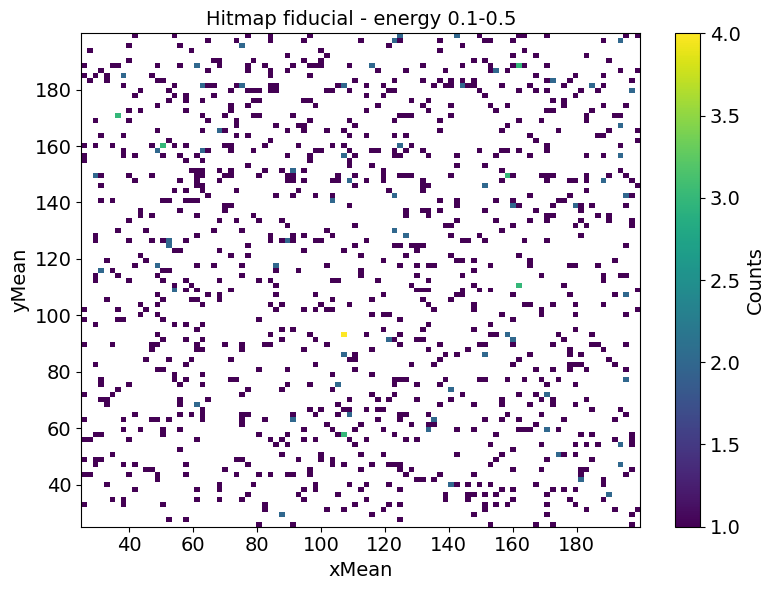

In [9]:
# Apply cut
cut =   (energy > 0.1) & (energy < 0.5) & (xMean > 25) & (xMean < 200) &  (yMean > 25) & (yMean < 200)
#(xy2sigma > 0.5) & (amplitude_ratio > 3.5) & (energy < 0.5)
x = ak.to_numpy(xMean[cut])
y = ak.to_numpy(yMean[cut])

# Compute 2D histogram
x_bins = np.linspace(np.min(x), np.max(x), 100)
y_bins = np.linspace(np.min(y), np.max(y), 100)
H, xedges, yedges = np.histogram2d(x, y, bins=[x_bins, y_bins])

# Mask zero-count bins
H_masked = np.ma.masked_where(H == 0, H)

# Plot with masked bins as white
fig, ax = plt.subplots(figsize=(8, 6))
mesh = ax.pcolormesh(xedges, yedges, H_masked.T, cmap='viridis')
plt.tick_params(axis='both', labelsize=14)

# Add colorbar
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label("Counts", size=14)
cbar.ax.tick_params(labelsize=14)

# Labels
ax.set_xlabel("xMean", size=14)
ax.set_ylabel("yMean", size=14)
ax.set_title("Hitmap fiducial - energy 0.1-0.5", size=14)

#plt.xlim(0,6000)
#plt.ylim(0,20)

plt.tight_layout()
plt.show()

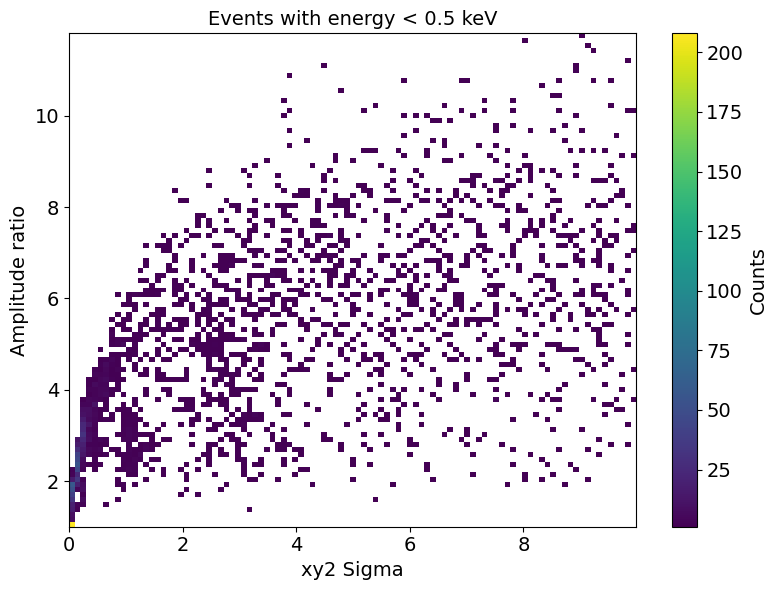

In [10]:

# Apply cut
cut = (xy2sigma < 10) & (amplitude_ratio < 12) & (energy < 0.5)
x = ak.to_numpy(xy2sigma[cut])
y = ak.to_numpy(amplitude_ratio[cut])

# Compute 2D histogram
x_bins = np.linspace(np.min(x), np.max(x), 100)
y_bins = np.linspace(np.min(y), np.max(y), 100)
H, xedges, yedges = np.histogram2d(x, y, bins=[x_bins, y_bins])

# Mask zero-count bins
H_masked = np.ma.masked_where(H == 0, H)

# Plot with masked bins as white
fig, ax = plt.subplots(figsize=(8, 6))
mesh = ax.pcolormesh(xedges, yedges, H_masked.T, cmap='viridis')
plt.tick_params(axis='both', labelsize=14)

# Add colorbar
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label("Counts", size=14)
cbar.ax.tick_params(labelsize=14)

# Labels
ax.set_xlabel("xy2 Sigma", size=14)
ax.set_ylabel("Amplitude ratio", size=14)
ax.set_title("Events with energy < 0.5 keV", size=14)

#plt.xlim(0,6000)
#plt.ylim(0,20)

plt.tight_layout()
plt.show()

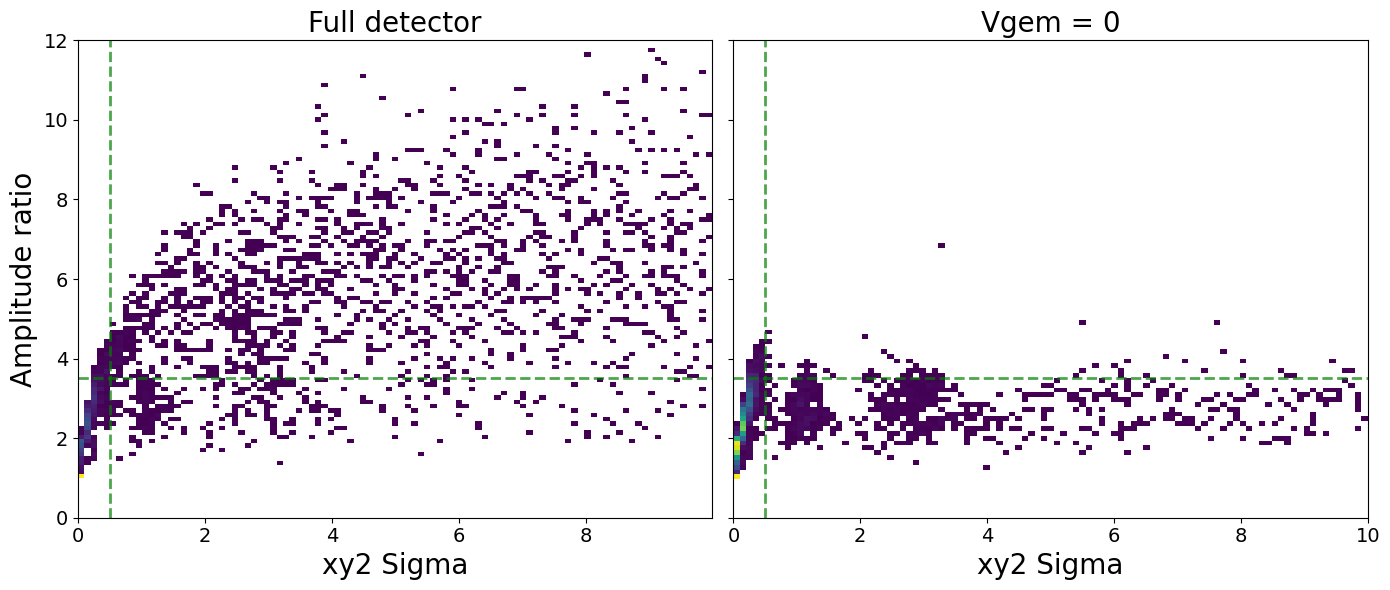

In [11]:
# Apply cut
cut2 = (xy2sigma2 < 10) & (amplitude_ratio2 < 12) & (energy2 < 0.5)
x2 = ak.to_numpy(xy2sigma2[cut2])
y2 = ak.to_numpy(amplitude_ratio2[cut2])

# Compute 2D histogram
x_bins2 = np.linspace(0, 10, 100)
y_bins2 = np.linspace(0, 12, 100)
H_2, xedges_2, yedges_2 = np.histogram2d(x2, y2, bins=[x_bins2, y_bins2])

# Mask zero-count bins
H_masked2 = np.ma.masked_where(H_2 == 0, H_2)


# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Energy < 0.5
mesh = axes[0].pcolormesh(xedges, yedges, H_masked.T, cmap='viridis')
axes[0].set_xlabel("xy2 Sigma", fontsize=20)
axes[0].set_ylabel("Amplitude ratio", fontsize=20)
axes[0].set_title("Full detector", fontsize=20)
axes[0].tick_params(axis='both', labelsize=14)

# Lines
axes[0].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[0].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

# Right:
mesh2 = axes[1].pcolormesh(xedges_2, yedges_2, H_masked2.T, cmap='viridis')
axes[1].set_xlabel("xy2 Sigma",  fontsize=20)
axes[1].set_title("Vgem = 0", fontsize=20)
axes[1].tick_params(axis='both', labelsize=14)

# Lines
axes[1].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[1].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()


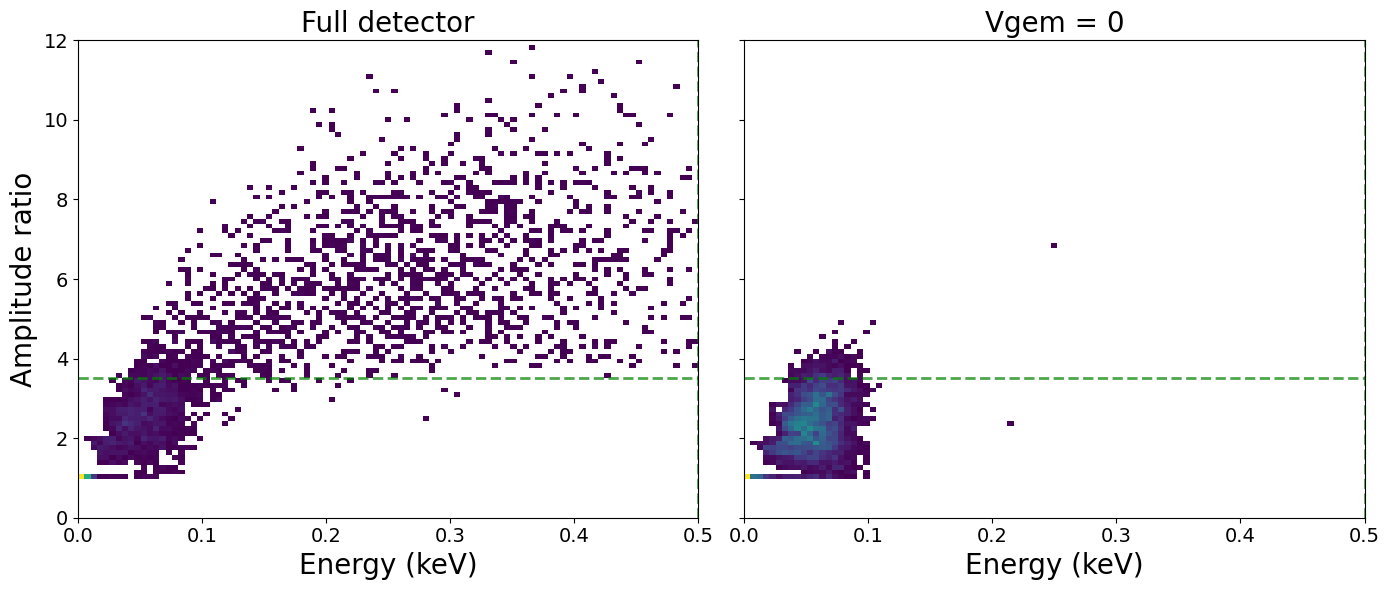

In [12]:
# Apply cut
cut = (xy2sigma < 10) & (amplitude_ratio < 12) & (energy < 0.5)
xe = ak.to_numpy(energy[cut])
ye = ak.to_numpy(amplitude_ratio[cut])

# Compute 2D histogram
x_bins = np.linspace(0, 0.5, 100)
y_bins = np.linspace(0, 12, 100)
He, xedges, yedges = np.histogram2d(xe, ye, bins=[x_bins, y_bins])

# Mask zero-count bins
He_masked = np.ma.masked_where(He == 0, He)

# Apply cut
cut2 = (xy2sigma2 < 10) & (amplitude_ratio2 < 12) & (energy2 < 0.5)
x2 = ak.to_numpy(energy2[cut2])
y2 = ak.to_numpy(amplitude_ratio2[cut2])

# Compute 2D histogram
x_bins2 = np.linspace(0, 0.5, 100)
y_bins2 = np.linspace(0, 12, 100)
He_2, xedges_2, yedges_2 = np.histogram2d(x2, y2, bins=[x_bins2, y_bins2])

# Mask zero-count bins
He_masked2 = np.ma.masked_where(He_2 == 0, He_2)


# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Energy < 0.5
mesh = axes[0].pcolormesh(xedges, yedges, He_masked.T, cmap='viridis')
axes[0].set_xlabel("Energy (keV)", fontsize=20)
axes[0].set_ylabel("Amplitude ratio", fontsize=20)
axes[0].set_title("Full detector", fontsize=20)
axes[0].tick_params(axis='both', labelsize=14)

# Lines
axes[0].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[0].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

# Right: Energy 0.1-0.5
mesh2 = axes[1].pcolormesh(xedges_2, yedges_2, He_masked2.T, cmap='viridis')
axes[1].set_xlabel("Energy (keV)",  fontsize=20)
axes[1].set_title("Vgem = 0", fontsize=20)
axes[1].tick_params(axis='both', labelsize=14)

# Lines
axes[1].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[1].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

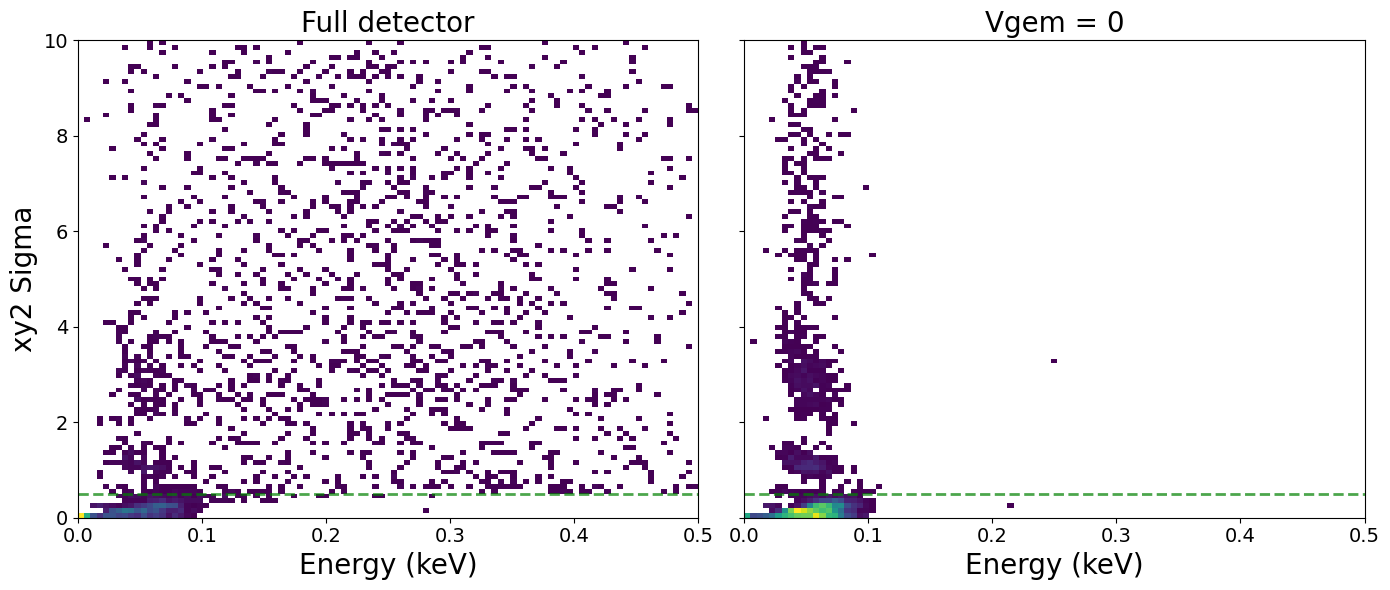

In [13]:
# Apply cut
cut = (xy2sigma < 10) & (amplitude_ratio < 12) & (energy < 0.5)
xs = ak.to_numpy(energy[cut])
ys = ak.to_numpy(xy2sigma[cut])

# Compute 2D histogram
x_bins = np.linspace(0, 0.5, 100)
y_bins = np.linspace(0, 10, 100)
Hs, xedges, yedges = np.histogram2d(xs, ys, bins=[x_bins, y_bins])

# Mask zero-count bins
Hs_masked = np.ma.masked_where(Hs == 0, Hs)

# Apply cut
cut2 = (xy2sigma2 < 10) & (amplitude_ratio2 < 12) & (energy2 < 0.5)
xs2 = ak.to_numpy(energy2[cut2])
ys2 = ak.to_numpy(xy2sigma2[cut2])

# Compute 2D histogram
x_bins2 = np.linspace(0, 0.5, 100)
y_bins2 = np.linspace(0, 10, 100)
Hs_2, xedges_2, yedges_2 = np.histogram2d(xs2, ys2, bins=[x_bins2, y_bins2])

# Mask zero-count bins
Hs_masked2 = np.ma.masked_where(Hs_2 == 0, Hs_2)


# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: 
mesh = axes[0].pcolormesh(xedges, yedges, Hs_masked.T, cmap='viridis')
axes[0].set_xlabel("Energy (keV)", fontsize=20)
axes[0].set_ylabel("xy2 Sigma", fontsize=20)
axes[0].set_title("Full detector", fontsize=20)
axes[0].tick_params(axis='both', labelsize=14)

# Lines
#axes[0].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[0].axhline(y=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

# Right: 
mesh2 = axes[1].pcolormesh(xedges_2, yedges_2, Hs_masked2.T, cmap='viridis')
axes[1].set_xlabel("Energy (keV)",  fontsize=20)
axes[1].set_title("Vgem = 0", fontsize=20)
axes[1].tick_params(axis='both', labelsize=14)

# Lines
#axes[1].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[1].axhline(y=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

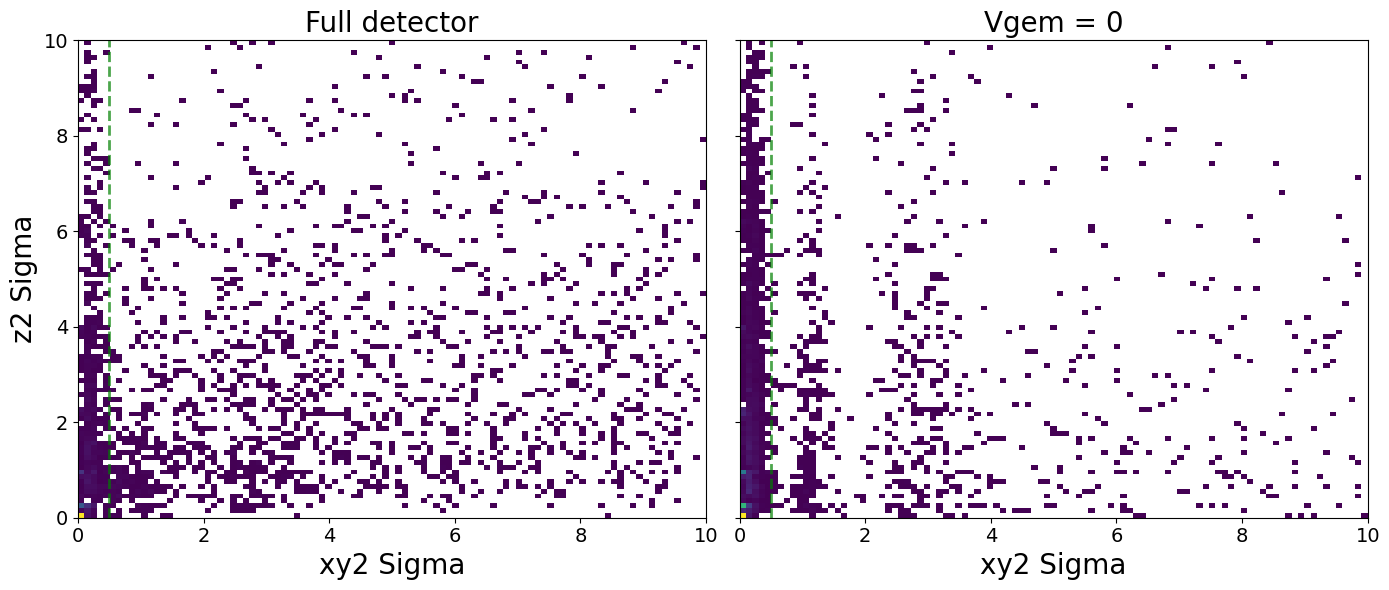

In [14]:
# Apply cut
cut = (xy2sigma < 10) & (amplitude_ratio < 12) & (energy < 0.5)
xz = ak.to_numpy(xy2sigma[cut])
yz = ak.to_numpy(z2sigma[cut])

# Compute 2D histogram
x_bins = np.linspace(0, 10, 100)
y_bins = np.linspace(0, 10, 100)
Hz, xedges, yedges = np.histogram2d(xz, yz, bins=[x_bins, y_bins])

# Mask zero-count bins
Hz_masked = np.ma.masked_where(Hz == 0, Hz)

# Apply cut
cut2 = (xy2sigma2 < 10) & (amplitude_ratio2 < 12) & (energy2 < 0.5)
xz2 = ak.to_numpy(xy2sigma2[cut2])
yz2 = ak.to_numpy(z2sigma2[cut2])

# Compute 2D histogram
x_bins2 = np.linspace(0, 10, 100)
y_bins2 = np.linspace(0, 10, 100)
Hz_2, xedges_2, yedges_2 = np.histogram2d(xz2, yz2, bins=[x_bins2, y_bins2])

# Mask zero-count bins
Hz_masked2 = np.ma.masked_where(Hz_2 == 0, Hz_2)


# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Energy < 0.5
mesh = axes[0].pcolormesh(xedges, yedges, Hz_masked.T, cmap='viridis')
axes[0].set_xlabel("xy2 Sigma", fontsize=20)
axes[0].set_ylabel("z2 Sigma", fontsize=20)
axes[0].set_title("Full detector", fontsize=20)
axes[0].tick_params(axis='both', labelsize=14)

# Lines
axes[0].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
#axes[0].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

# Right: Energy 0.1-0.5
mesh2 = axes[1].pcolormesh(xedges_2, yedges_2, Hz_masked2.T, cmap='viridis')
axes[1].set_xlabel("xy2 Sigma",  fontsize=20)
axes[1].set_title("Vgem = 0", fontsize=20)
axes[1].tick_params(axis='both', labelsize=14)

# Lines
axes[1].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
#axes[1].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

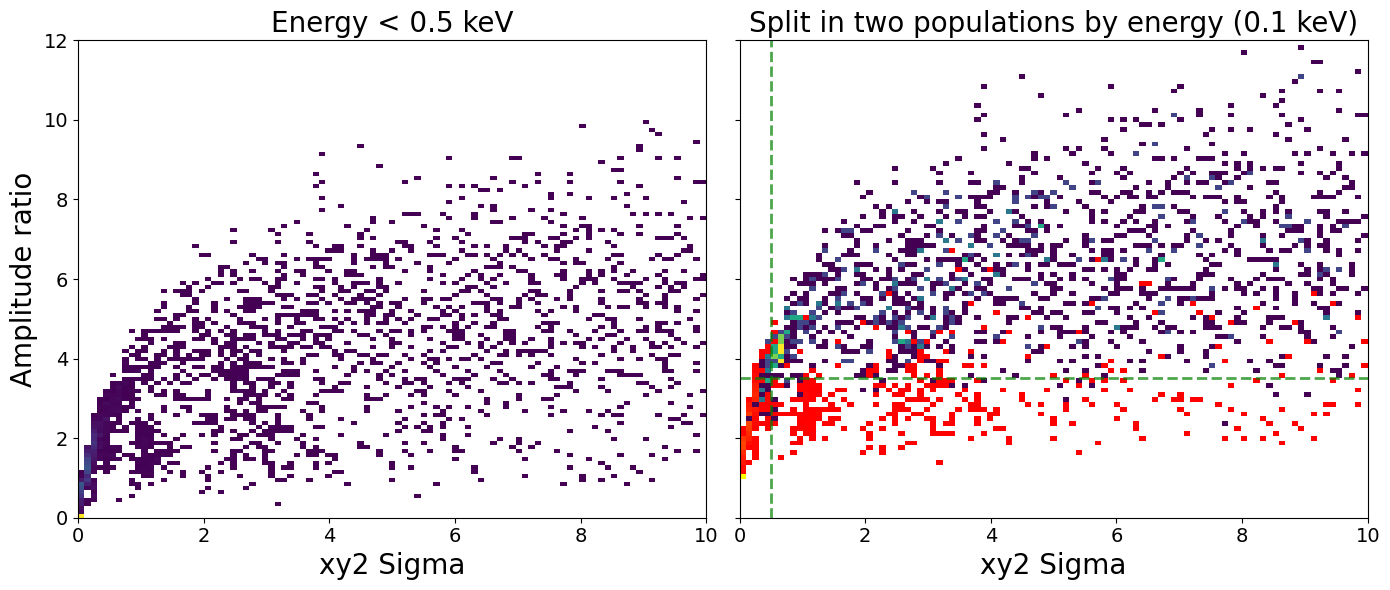

In [15]:
# Cuts
cut_lowEnergy = (xy2sigma < 10) & (amplitude_ratio < 12) & (energy < 0.1)
cut_highEnergy = (xy2sigma < 10) & (amplitude_ratio < 12) & (energy > 0.1) & (energy < 0.5)

# Variables
x_low = ak.to_numpy(xy2sigma[cut_lowEnergy])
y_low = ak.to_numpy(amplitude_ratio[cut_lowEnergy])

x_high = ak.to_numpy(xy2sigma[cut_highEnergy])
y_high = ak.to_numpy(amplitude_ratio[cut_highEnergy])

# Compute histograms
x_bins = np.linspace(0, 10, 100)
y_bins = np.linspace(0, 12, 100)
H1, xedges1, yedges1 = np.histogram2d(x_low, y_low, bins=[x_bins, y_bins])
H2, xedges2, yedges2 = np.histogram2d(x_high, y_high, bins=[x_bins, y_bins])

# Mask zero bins
H1_masked = np.ma.masked_where(H1 == 0, H1)
H2_masked = np.ma.masked_where(H2 == 0, H2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Energy < 0.5
mesh = axes[0].pcolormesh(xedges, yedges, H_masked.T, cmap='viridis')
axes[0].set_xlabel("xy2 Sigma", fontsize=20)
axes[0].set_ylabel("Amplitude ratio", fontsize=20)
axes[0].set_title("Energy < 0.5 keV", fontsize=20)
axes[0].tick_params(axis='both', labelsize=14)
#plt.colorbar(mesh, ax=axes[0], label="Counts")


# Right: Energy 0.1-0.5
mesh_low = axes[1].pcolormesh(xedges1, yedges1, H1_masked.T, cmap='autumn')
mesh_high = axes[1].pcolormesh(xedges2, yedges2, H2_masked.T, cmap='viridis')
axes[1].set_xlabel("xy2 Sigma",  fontsize=20)
axes[1].set_title("Split in two populations by energy (0.1 keV)", fontsize=20)
axes[1].tick_params(axis='both', labelsize=14)

axes[1].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[1].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)



plt.tight_layout()
plt.show()

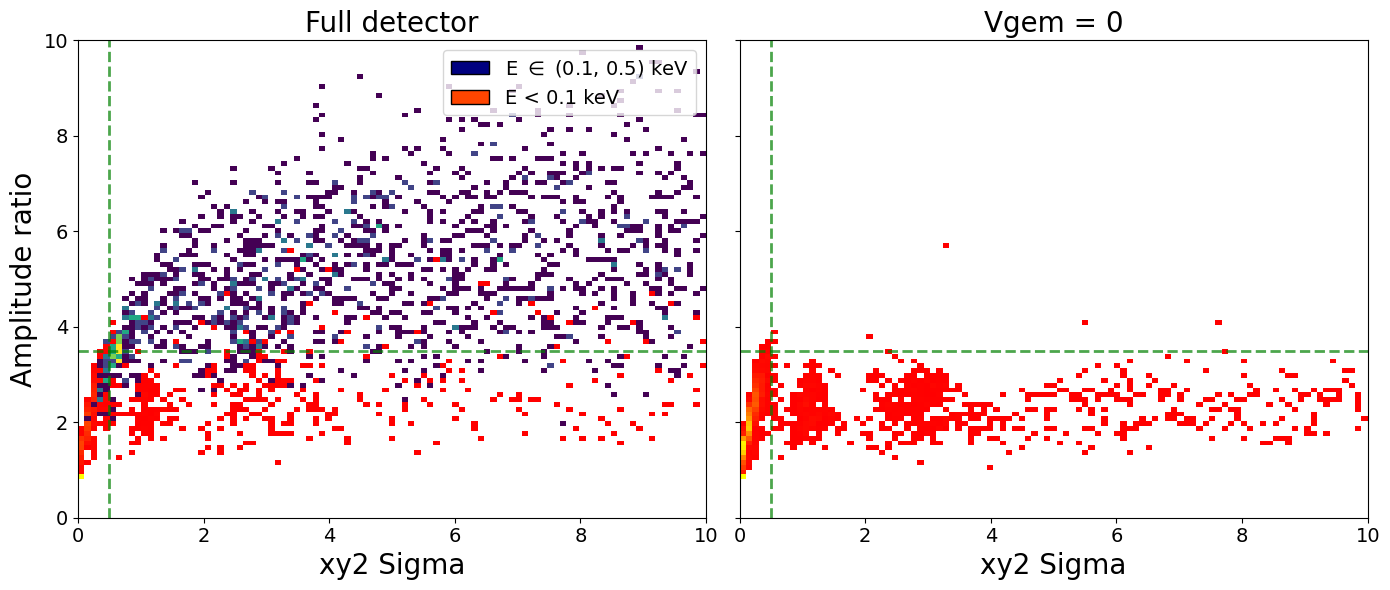

In [16]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Full detector
mesh_low = axes[0].pcolormesh(xedges, yedges, H1_masked.T, cmap='autumn')
mesh_high = axes[0].pcolormesh(xedges, yedges, H2_masked.T, cmap='viridis')
axes[0].set_xlabel("xy2 Sigma",  fontsize=20)
axes[0].set_ylabel("Amplitude ratio", fontsize=20)
axes[0].set_title("Full detector", fontsize=20)
axes[0].tick_params(axis='both', labelsize=14)

legend_elements = [
    Patch(facecolor='navy', edgecolor='k', label=r'E $\in $ (0.1, 0.5) keV'),
    Patch(facecolor='orangered', edgecolor='k', label='E < 0.1 keV')
]

axes[0].legend(handles=legend_elements, fontsize=14, loc='upper right')

axes[0].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[0].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

# Right: Vgem = 0
mesh2 = axes[1].pcolormesh(xedges, yedges, H_masked2.T, cmap='autumn')
axes[1].set_xlabel("xy2 Sigma",  fontsize=20)
axes[1].set_title("Vgem = 0", fontsize=20)
axes[1].tick_params(axis='both', labelsize=14)

# Lines
axes[1].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[1].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()



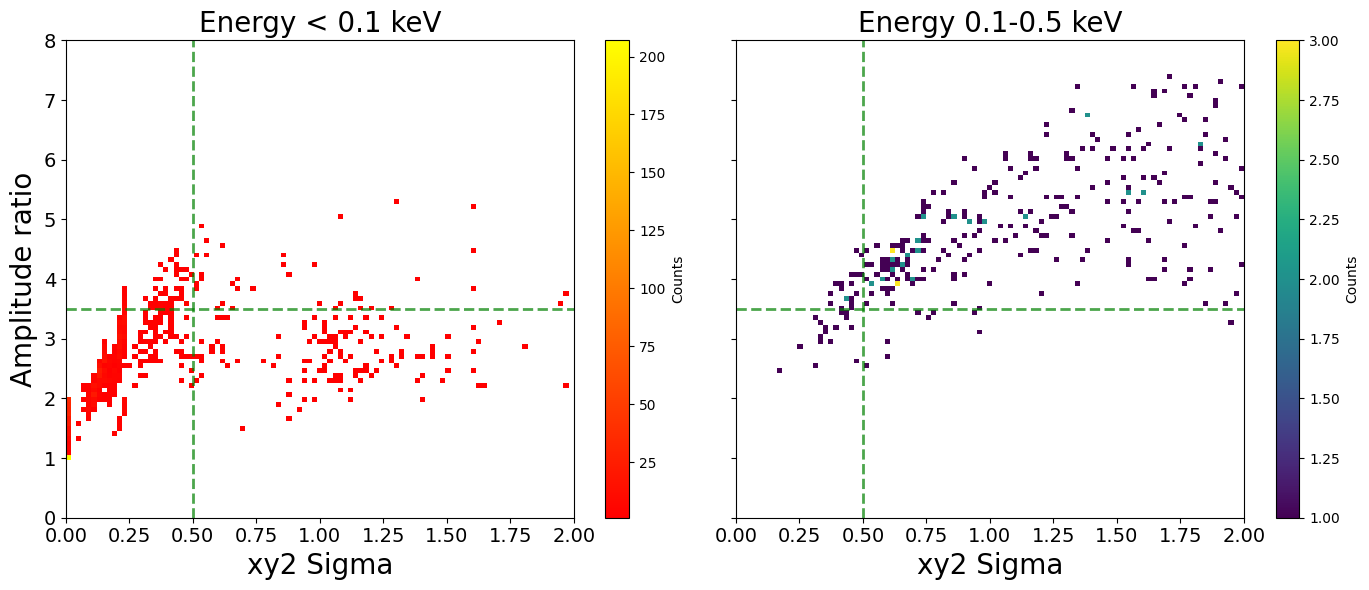

In [17]:
# Cuts
cut_lowEnergy = (xy2sigma < 2) & (amplitude_ratio < 8) & (energy < 0.1)
cut_highEnergy = (xy2sigma < 2) & (amplitude_ratio < 8) & (energy > 0.1) & (energy < 0.5)

# Variables
x_low = ak.to_numpy(xy2sigma[cut_lowEnergy])
y_low = ak.to_numpy(amplitude_ratio[cut_lowEnergy])

x_high = ak.to_numpy(xy2sigma[cut_highEnergy])
y_high = ak.to_numpy(amplitude_ratio[cut_highEnergy])

# Compute histograms

x_bins = np.linspace(0, 2, 100)
y_bins = np.linspace(0, 8, 100)
H1, xedges1, yedges1 = np.histogram2d(x_low, y_low, bins=[x_bins, y_bins])
H2, xedges2, yedges2 = np.histogram2d(x_high, y_high, bins=[x_bins, y_bins])

# Mask zero bins
H1_masked = np.ma.masked_where(H1 == 0, H1)
H2_masked = np.ma.masked_where(H2 == 0, H2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Energy < 0.1
mesh1 = axes[0].pcolormesh(xedges1, yedges1, H1_masked.T, cmap='autumn')
axes[0].set_xlabel("xy2 Sigma", fontsize=20)
axes[0].set_ylabel("Amplitude ratio", fontsize=20)
axes[0].set_title("Energy < 0.1 keV", fontsize=20)
axes[0].tick_params(axis='both', labelsize=14)
plt.colorbar(mesh1, ax=axes[0], label="Counts")
# Lines
axes[0].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[0].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

# Right: Energy 0.1-0.5
mesh2 = axes[1].pcolormesh(xedges2, yedges2, H2_masked.T, cmap='viridis')
axes[1].set_xlabel("xy2 Sigma",  fontsize=20)
axes[1].set_title("Energy 0.1-0.5 keV", fontsize=20)
axes[1].tick_params(axis='both', labelsize=14)
plt.colorbar(mesh2, ax=axes[1], label="Counts")
# Lines
axes[1].axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
axes[1].axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

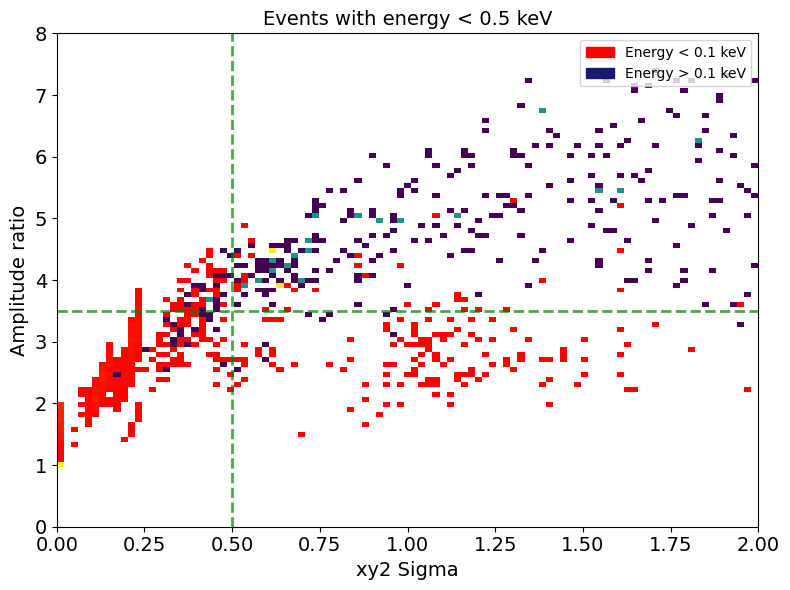

In [18]:
from matplotlib.patches import Patch

# Plot with masked bins as white
fig, ax = plt.subplots(figsize=(8, 6))
mesh1 = ax.pcolormesh(xedges1, yedges1, H1_masked.T, cmap='autumn')
mesh2 = ax.pcolormesh(xedges2, yedges2, H2_masked.T, cmap='viridis')
plt.tick_params(axis='both', labelsize=14)

# Add colorbar
#cbar = plt.colorbar(mesh, ax=ax)
#cbar.set_label("Counts", size=14)
#cbar.ax.tick_params(labelsize=14)

# Custom legend using color patches
legend_patches = [
    Patch(color='red', label='Energy < 0.1 keV'),
    Patch(color='midnightblue', label='Energy > 0.1 keV')
]
ax.legend(handles=legend_patches, loc="upper right")

# Labels
ax.set_xlabel("xy2 Sigma", size=14)
ax.set_ylabel("Amplitude ratio", size=14)
ax.set_title("Events with energy < 0.5 keV", size=14)

# Lines
ax.axvline(x=0.5, color='green', alpha=0.7, linestyle='--', linewidth=2)
ax.axhline(y=3.5, color='green', alpha=0.7, linestyle='--', linewidth=2)

#plt.xlim(0,6000)
#plt.ylim(0,20)

#plt.legend()
plt.tight_layout()
plt.show()